<a href="https://colab.research.google.com/github/SanchezJJC/ApPhy-155/blob/master/Sanchez_lab_assignment_module1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name_: Sanchez, Jezreel John \
_Student No._: 2019-06919\
_Section_: HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: 25 October 2023; 5:20 pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Jezreel John C. Sanchez

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

Trapezoidal Rule

In [ ]:
#1.1 Setting up f(x) to integrate
def f(x):
  return 2*x**4 + 3*x**2 +4*x + 5

#1.2 Defining Trapezoidal Rule Integration
def Trapezoidal_Integral(N=10, a=0, b=5, Display_Print=False, **kwargs):
  """
  This function evaluates integrals using the trapezoidal rule.
  N is the number of slices; a and b are the lower and upper bounds respectively of the integral.
  """
  #1.3 Default N, a,and b were initialized. h is the width of each slice
  h = (b-a)/N

  #1.4 We define sum s as a partial sum
  #It's the area of our trapezoid divided by height h, since h is the same for all our trapezoids.
  #Here, we're defining the initial value of the partial sum.
  s = 0.5*f(a) + 0.5*f(b)

  for k in range (1,N): #1.5 k here actually runs from 1 to N-1 inclusive; k refers to the kth trapezoidal slice of the integral.
    s+= f(a + k*h) #1.6 We're adding up the area divided by h of each slice here, iterating over the for loop lets us add up each slice.

  total_Area = s*h #1.7 This is the total area

  if Display_Print == True:
    print(f"Area: {total_Area}; No. of Slices: {N}; Endpoints (a,b): ({a},{b})")

  else:
    return total_Area

#1.8 N = 10 Slices
Trapezoidal_Integral(N=10, Display_Print=True)

#1.9 N = 100 Slices
Trapezoidal_Integral(N=100, Display_Print=True)

#1.10 N = 1000 Slices
Trapezoidal_Integral(N=1000, Display_Print=True)


Area: 1471.4375; No. of Slices: 10; Endpoints (a,b): (0,5)
Area: 1450.2145812500003; No. of Slices: 100; Endpoints (a,b): (0,5)
Area: 1450.0021458331234; No. of Slices: 1000; Endpoints (a,b): (0,5)


Trapezoidal Rule Error Calculation

In [ ]:
#1.11 The analytically computed area is 1450 units

#1.12 Defining %Error function; The code for Trapezoidal Integral needs to be run before this one to prevent errors

def Trapezoidal_Error(Slice=10, Theoretical=1450, **kwargs):
  """
  Computes error for integrating using Trapezoidal Rule.
  Slice is the no. slices used and Theoretical is the analytically computed value.
  """

  Trapezoidal_Integral(N=Slice)
  trap_error = 100*abs(Trapezoidal_Integral(N=Slice)-Theoretical)/abs(Theoretical)

  print(f"No. of Slices: {Slice}; %Error: {trap_error}%")

#1.13 Error for 10 Slices
Trapezoidal_Error(Slice=10)

#1.14 Error for 100 Slices
Trapezoidal_Error(Slice=100)

#1.15 Error for 1000 Slices
Trapezoidal_Error(Slice=1000)

No. of Slices: 10; %Error: 1.478448275862069%
No. of Slices: 100; %Error: 0.01479870689656999%
No. of Slices: 1000; %Error: 0.00014798849127240326%


The computed error conforms to the predicted error of the Trapezoidal Rule (The error is decreased by a factor of roughly $10^2$ whenever we multiply the number of slices by $10$). Deviations from this behavior are likely due to the machine's precision.


Simpson's Rule

In [ ]:
#1.16 Defining f(x) again so we can run this independently
def f(x):
  return 2*x**4 + 3*x**2 +4*x + 5

#1.17 Defining the Simpson's Rule Integration function
def Simpson_Integral(N=10, a=0, b=5, Display_Print=False, **kwargs):
  """
  This function evaluates integrals using the Simpson's rule (fitting quadratic curves then using trapezoids).
  N is the number of slices; a and b are the lower and upper bounds respectively of the integral.
  """
  #1.18 h is the height
  h = (b-a)/N

  #1.19 We initialize partial sum s
  s = f(a) + f(b)

  for k in range(1,N,2): #1.20 We sum over the odd k this way from 1 to N-1
    s+= 4*f(a+k*h)

  for k in range(2,N,2): #1.21 We sum over the even k this way from 2 to N-2
    s+= 2*f(a+k*h)

  #1.22 Finally, we multiply (1/3)h to the s we summed up
  total_Area = (1/3)*h*s

  if Display_Print == True:
    print(f"Area: {total_Area}; No. of Slices: {N}; Endpoints (a,b): ({a},{b})")

  else:
    return total_Area

#1.23 N = 10 Slices
Simpson_Integral(N=10, Display_Print=True)

#1.24 N = 100 Slices
Simpson_Integral(N=100, Display_Print=True)

#1.25 N = 1000 Slices
Simpson_Integral(N=1000, Display_Print=True)


Area: 1450.0833333333333; No. of Slices: 10; Endpoints (a,b): (0,5)
Area: 1450.0000083333337; No. of Slices: 100; Endpoints (a,b): (0,5)
Area: 1450.000000000834; No. of Slices: 1000; Endpoints (a,b): (0,5)


Simpson's Rule Error

In [ ]:
#1.26 The analytically computed area is 1450 units

#1.27 Defining %Error function; The code for Simpson_Integral needs to be run before this one to prevent errors

def Simpson_Error(Slice=10, Theoretical=1450, **kwargs):
  """
  Computes error for integrating using Simpson's Rule.
  Slice is the no. slices used and Theoretical is the analytically computed value.
  """
  Simpson_Integral(N=Slice)
  trap_error = 100*abs(Simpson_Integral(N=Slice)-Theoretical)/abs(Theoretical)

  print(f"No. of Slices: {Slice}; %Error: {trap_error}%")

#1.28 Error for 10 Slices
Simpson_Error(Slice=10)

#1.29 Error for 100 Slices
Simpson_Error(Slice=100)

#1.30 Error for 1000 Slices
Simpson_Error(Slice=1000)

No. of Slices: 10; %Error: 0.005747126436776382%
No. of Slices: 100; %Error: 5.747126657485657e-07%
No. of Slices: 1000; %Error: 5.75176994155707e-11%


The computed error of the area obtained via Simpson's Rule is far lower than that of the Trapezoidal Rule for the same number of slices. This error conforms with the predicted behavior for the Simpson's Rule error given that increasing the number of slices by a factor of $10$ decreases the error by a factor of $10^4$. Any deviations from this behavior are likely due to machine precision.

### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [ ]:
#2.1 Defining f(x)
def f(x):
  return 2*x**4 + 3*x**2 +4*x + 5

#2.2 Importing necessary packages
from numpy import ones, copy, cos, tan, pi, linspace

#2.3 Defining the gaussxw function from Appendix E of Newman
def gaussxw(N):
  """
  This function calculates the sample points and weights
  needed to perorm Gaussian quadrature.
  """

  #2.4 Initial approximation of roots of Legendre Polynomial
  a_ = linspace(3, 4*N-2, N)/(4*N+2)
  x = cos(pi*a_+1/(8*N*N*tan(a_)))

  #2.5 Find Roots using Newton's method
  epsilon = 1e-15
  delta = 1.
  while delta>epsilon:
    p0 = ones(N, float)
    p1 = copy(x)
    for k in range (1,N):
      p0, p1 = p1, ((2*k+1)*x*p1-k*p0)/(k+1)
    dp = (N+1)*(p0-x*p1)/(1-x*x)
    dx = p1/dp
    x-=dx
    delta = max(abs(dx))

  #2.6 Calculate weights
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

  return x,w

#2.7 Defining gaussxwab function
def gaussxwab(N, a_, b_):
  """
  Uses gaussxw(N) to calculate positions and wieghts then performs the
  transformation. Returns arrays x and w for any interval [a,b] specified
  """
  x,w = gaussxw(N)
  return 0.5*(b_-a_)*x + 0.5*(b_+a_), 0.5*(b_-a_)*w




#2.8 Defining Gaussian Quadrature Integral Function
def Gauss_Integral(N=3, a_=0, b_=5, Display_Text=False, **kwargs):
  """
  Evaluates integrals using the Gaussian Quadrature Method
  a_ is lower limit; b_ is upper limit; N is the number of sample points;
  Display_Text toggles between returning the area (False) and returning the
  accompanying text.
  """
  #2.9 Calls the gaussxw(N) function to calculate sample points and weights
  x,w = gaussxw(N)
  xp = 0.5*(b_-a_)*x +0.5*(b_+a_)
  wp = 0.5*(b_-a_)*w

  #2.10 This is the initial value of partial sum s
  s = 0.

  #2.11 This loop does the integrating by adding the product of f(x)
  # evaluated at the computed points and the appropriate weight computed by
  # gaussxw(N)
  for k in range (N):
    s+= wp[k]*f(xp[k])

  if Display_Text == True:
    print(f"Area: {s}; No. of sample points: {N}")

  else:
    return s

#2.12 Calculating the integral
Gauss_Integral(N=3, Display_Text=True)




Area: 1450.0000000000023; No. of sample points: 3


Given that the Gaussian quadrature method with $N$ sample points is only able to exactly compute for the value of the integral of a polynomial of degree $N-1$, the error we see here is due to both machine precision and the inherent error of the Gaussian quadrature method (We have 3 sample points, but we're integrating a degree 4 polynomial).

Still, compared to the Trapezoidal rule and Simpson's rule methods, Gaussian quadrature is still superior in terms of accuracy for this application.

### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

<ipython-input-6-57284a6a7370>:13: RuntimeWarning: divide by zero encountered in double_scalars
  return ((8*mass)**0.5)/((V(amplitude)-V(x))**0.5)
<ipython-input-6-57284a6a7370>:77: RuntimeWarning: invalid value encountered in double_scalars
  s+= wp[k]*g(x=xp[k], amplitude=a, mass=m)


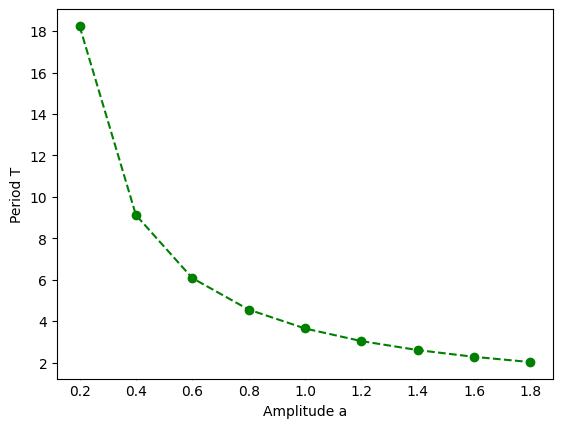

In [ ]:
#3.1 Importing necessary packages
import matplotlib.pyplot as plt
import numpy as np

#3.2 Defining potential V(x)
def V(x):
  return x**4

#3.4 Defining Integrand function g(x,a,m)
#V(amplitude) is the energy at the turning point, which is also the total energy
#given that the system is conservative and that the kinetic energy is zero there.
def g(x,amplitude,mass, **kwargs):
  return ((8*mass)**0.5)/((V(amplitude)-V(x))**0.5)

#3.5 We'll adopt the Gaussian quadrature code and make a few modifications

#2.3 Defining the gaussxw function from Appendix E of Newman
def gaussxw(N):
  """
  This function calculates the sample points and weights
  needed to perorm Gaussian quadrature.
  """

  #2.4 Initial approximation of roots of Legendre Polynomial
  a_ = np.linspace(3, 4*N-2, N)/(4*N+2)
  x = np.cos(np.pi*a_+1/(8*N*N*np.tan(a_)))

  #2.5 Find Roots using Newton's method
  epsilon = 1e-15
  delta = 1.
  while delta>epsilon:
    p0 = np.ones(N, float)
    p1 = np.copy(x)
    for k in range (1,N):
      p0, p1 = p1, ((2*k+1)*x*p1-k*p0)/(k+1)
    dp = (N+1)*(p0-x*p1)/(1-x*x)
    dx = p1/dp
    x-=dx
    delta = max(abs(dx))

  #2.6 Calculate weights
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

  return x,w

#2.7 Defining gaussxwab function
def gaussxwab(N, a_, a):
  """
  Uses gaussxw(N) to calculate positions and wieghts then performs the
  transformation. Returns arrays x and w for any interval [a,b] specified
  """
  x,w = gaussxw(N)
  return 0.5*(a-a_)*x + 0.5*(a+a_), 0.5*(a-a_)*w




#3.6 Defining Period T function by adopting Gaussian Quadrature Integral
# Function Code
def Period_T(N=20, a_=0., a=2., m=1., Display_Text=False, **kwargs):
  """
  Evaluates Period T integral using the Gaussian Quadrature Method.
  """
  #2.9 Calls the gaussxw(N) function to calculate sample points and weights
  x,w = gaussxw(N)
  xp = 0.5*(a-a_)*x +0.5*(a+a_)
  wp = 0.5*(a-a_)*w

  #2.10 This is the initial value of partial sum s
  s = 0.

  #3.7 This loop does the integrating by adding the product of g(x)
  # evaluated at the computed points and the appropriate weight computed by
  # gaussxw(N)
  # here, we modified the input function to accomodate mass and amplitude inputs
  for k in range (N):
    s+= wp[k]*g(x=xp[k], amplitude=a, mass=m)

  if Display_Text == True:
    print(f"Period: {s} [time units]; No. of sample points: {N}")

  else:
    return s

#3.8 Now, we make a function to use for plotting the behavior of T as we vary a
def sample_points_T_a(sample_N=10, eval_a1=0, eval_a2=2, use_T=True, **kwargs):
  """
  When use_T is True,
  Takes sample_N sample points for the period function to be evaluated
  from points eval_a1 to eval_2.

  otherwise,
  Takes sample_N points of the amplitude a

  The points are evenly spaced

  After calculation, the points are put into an np array.
  """
  #3.9 Defining uniform interval h
  h = (eval_a2 - eval_a1)/sample_N

  if use_T == True:
    #3.10 Initializing sample period T points array
    sample_T = np.empty(sample_N,float)

    #3.11 Evaluates Period_T at each amplitude point separated by h from
    #amplitude eval_a1 to eval_a2, and puts the result in an array
    for i in range(sample_N):
      sample_T[i] = Period_T(N=20, a_=0., a=(eval_a1+i*h), m=1.)

    return sample_T

  else:
    #3.12 Initializing sample amplitude a points array
    sample_a =  np.empty(sample_N,float)

    #3.13 Puts each amplitude point separated by h from eval_a1 to eval_a2 into
    #an array. Given the same sample_N, eval_a1 and eval_a2, this makes an array
    #of points used to evaluate Period_T when use_T is True
    for i in range(sample_N):
      sample_a[i] = a=(eval_a1+i*h)

    return sample_a

#3.14 These are the arrays we will actually use for plotting
T_points = sample_points_T_a(N=10)
a_points = sample_points_T_a(N=10,use_T=False)

#3.15 Plotting Period T as a function of amplitude a
fig, ax = plt.subplots()
ax.plot(a_points, T_points, marker="o", linestyle="--", color="green")

#3.16 Setting Labels
ax.set_xlabel("Amplitude a")
ax.set_ylabel("Period T")

#3.16 The graph shown is only able to show 9 points and connects each point
plt.show()



As seen on the graph, the period decreases as we increase the amplitude. This means that the frequency increases as we increase the amplitude. In other words, the oscillations get faster even though the amount needed to be travelled increases. This suggests that the restoring force of the oscillator must be increasing with the amplitude for this behavior to take place.

On the other hand, as the amplitude approaches zero, the period approaches infinity, indicating that the oscillations get slower as the amplitude decreases.